# Assignment 2

## Jade Benson

This notebook is a pilot study for my final project in the 2022 class "Cultural Patterns" where I use computational methods to identify cultural trends. I wanted to keep this notebook public for use in my portfolio - it can also be accessed on Github at: https://github.com/JadeBenson/Healthy_Food.  

## Research Question and Motivation

I am interested in how different groups discuss their relationships with food online, particularly how specific foods are moralized and constructed to be "healthy." The fitness community has many subgroups that demonize certain food groups, primarily carbs which can be seen in diet trends like "Keto," "Paleo," and "Counting Macros." Even something so simple as describing highly processed foods as "junk" conveys a moral argument about the worth of certain foods, and by extension, the worth of the people who regularly consume them. This moralistic rhetoric, often accompanied by images of idealized bodies or bodies to shame (or both in before-and-afters), can inspire restrictive dieting and fears surrounding certain foods and bodies. But opposition groups have also arisen to try to combat this ideology, like the body positive movement. This community tries to celebrate bodies of diverse sizes, shapes, and abilities while removing moralistic associations with food to allow for an "intuitive" eating relationship that tries to reduce the stress of other eating practices. There is perhaps even a third community of professionals (dietians, public health officials, doctors) who acknowledge the need of moderate diets to address the consequences of obesity (particularly in the US), but how this problem is larger than just eating and includes food deserts, economic inequality, easy access to nutrient deficient foods, and corporate incentives. These communities have competing definitions of what constitutes "healthy." 

In this research project, I aim to use Twitter data to identify how people describe and conceptualize "healthy" food and eating and how this differs across subgroups. I am also interested in whether these subgroups are interconnected - is there cross-talk across these groups or are they relatively distinct with separate cultures and understandings of health? Does the professional group attempt to infilitrate fitness influencer or body positive conversations as a part of public health campaigns to give people access to other types of food/diet information? Do certain fitness/diet groups co-op the language of "obesity" and "obesity crisis" as a moralistic term aimed at scaring people into particular ways of eating? Does the body positive movement discredit the metrics and tools of other communities (BMI, calorie counting) to re-establish their own understanding of healthy? I am interested in computationally analyzing these conversations to better understand how healthy food and eating are constructed online. 

## Data Sources and Methods 

I am planning on using the Twitter API to scrape tweets related to these groups and topics of healthy eating and food. I think Twitter is perhaps the best social media site to use for this project because it includes so many diverse groups on the same platform. It also primarily centers around text conversations which allows us to better see how people are talking about these subjects. The replies/mentions can be easily analyzed too so we can see whether there is cross-talk or if the groups are distinct. I have also conducted a prior project using the Twitter API and scraping data, so I feel more comfortable conducting this analysis in the short time frame. I think Tiktok may skew a little younger and more informal so would likely have fitness and body positive content, but perhaps not professionals. It also centers around videos more so than text and I'm interested in how people talk about these concepts - but it would be interesting to expand my skill set to try to get video transcriptions or how the images in videos relate to their short descriptions/tags. Reddit would be another option, but I am less familar with the pages that I would need to scrape to effectively cover these conversations. This might make a good backup plan though as I am a little concerned that searching Twitter for "healthy" right now may return more COVID content than food (I'll try to address this with conditions). Reddit might allow for more granular searches, but may not have as much back-and-forth which I am interested in studying. 


Deciding how to write a query that effectively picks up all these communities without grabbing too much irrelevant information will be a big challenge for the final version of this project. I'm trying to capture my idea of the three communities, but this might be baiting searches. Ideally, I want this project to be a combination of identifying linguistic and cultural communities and describing how they differentially use language and understand health and eating. If I am too granular with my searches, I might just be returning findings that I expect since I've filtered them to be that way, rather than capturing the potential complexities of larger cultural patterns. If I leave this query too broad, I may end up with irrelevant or disparate information which makes it challenging to find meaningful cohesive groups. If you have any recommendations on how to balance these problems, I'd love to discuss it in more depth. 

I just perform a topic analysis here where I try to assess how people are talking about healthy eating and whether these are distinct or more mixed. I am curious about this "moralistic" dimension of discourse. However, I find this is a little more difficult to capture. Perhaps the phrase "clean eating" is easier to identify as moralistic since it's associating certain types of food and eating practices with being "clean" and others as "dirty." But how do we capture the moral dimension of "fat" since it's used in so many contexts? Fat could be mentioned as one of the macronutrients needed in a healthy diet, an insult or fear from so many online, or a reclaiming of the word to find neutraility in it as just a descriptive adjective as seen in the bodypositive community. This sort of different meanings of words for different groups is challenging to capture both without and certainly with computational methods.   

In this version, I don't explicitly perform any network analysis. I am primarily interested in identifying the primary topics in Tweets and whether these are relatively pure (separate groups with distinct linguistic patterns/ideologies) or whether they are more mixed (groups sharing language/ideologies). I think that in the final version of this analysis, it could be interesting to plot which users are interacting with who and how their language differs. It would be intersting to not only identify what topics people are discussing and whether these are relatively distinct, but also to see how these people and these topics interact/intersect in networks/threads. If this is perhaps too much, it could be easier to look at what tweets caused the most discussion or were the most popular based on their retweet, like, or other engagement counts. 

## Data Gathering

In this section, I'll use the Twitter API to scrape tweets for a preliminary analysis. I use a small sample of tweets for this topic analysis test run. In the final version, I plan on expanding the number of Tweets scraped, tuning the search criteria, and conducting a more in-depth analyis of the users and their networks.

In [172]:
import tweepy
from tweepy import OAuthHandler

import requests

import pandas as pd
import csv
import re
import string
import time


import nltk
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess 
from gensim.models import CoherenceModel

import pyLDAvis
from pyLDAvis import gensim_models 
import pickle 
import os
from pprint import pprint

import matplotlib.pyplot as plt

In [2]:
#Jade's Twitter API 2.0 info 

#these API tokens might need regeneration
#api_token = "1393223500832382977-1AjGzeeo4Ue6PgFb0bV7ipOvwTezBF" 
#api_token_secret = "rSTeeGm2el1kFwC8kuyqK9upG3DGiCHKbMyyjix9lYNUl"

#access_token = "1393223500832382977-pXEzv2zITWvZpbUyGhxgjv6FyadfjJ"
#access_token_secret = "CJ3T7qSw43CgkMi0CC5Ecb8tiZMIA246xjnhkV8Qy1Ppv"

bearer_token = "AAAAAAAAAAAAAAAAAAAAAK%2FyZAEAAAAAknoZzdqGK6OIOejAHvMLFwAZ%2FaA%3DNm5WcRTGkrng2Jxg0ZQzuWfUGsqr1kJMtZKVuvSFMrjWsRiNPQ"
#from viral sentiments: bearer_token="AAAAAAAAAAAAAAAAAAAAAKROPwEAAAAArHftxA3yStRytXjFAYSPUj7180Y%3DTU6cQLajxIvPmhPDuxh0SQ5mMsjW7QbZYs6CyR8PNjDFwj8yMN"

In [3]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveSearchPython"
    return r

In [123]:
#create the URL to search the API (search/recent)
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

#params for recent search 
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent

def connect_to_endpoint(my_query, page_token):
    """
    Queries the API for 100 recent tweets using my_query for unique pages (token) 
    
    Input: 
        my_query: (str) consult the Twitter doc for formatting 
        page_token: (str) token returned by Twitter to track unique pages 
    
    Return: 
        dictionary of tweets, meta data, and token 
    """
     
    
    search_url = "https://api.twitter.com/2/tweets/search/recent"
    
    params = {'query': my_query,
            'expansions': "author_id,referenced_tweets.id,referenced_tweets.id.author_id,entities.mentions.username,in_reply_to_user_id,geo.place_id",
            'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings',
            'user.fields': 'description,id,location,name,url,username,verified',
            'max_results' : 100,
            'next_token': page_token}
    
    #defaults to scrape from start time of now to 7 days ago 
    
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [137]:
def process_batch_of_tweets(df_tweets, twitter_json): 
    """
    Processes scraped Twitter information and places it into a dataframe 
    Inputs: 
        df_tweets: (df) dataframe with columns for Twitter info 
        twitter_json: (json) returned information from Twitter query 
    
    Returns:
        dataframe with new info
    """
    
    for r in twitter_json['data']: 
        tweet_id = r['id']
        author_id = r['author_id']
        tweet_time = r['created_at']
        convo_id = r['conversation_id']

        tweet_text = r['text']

        num_retweets = r['public_metrics']['retweet_count']
        num_replies = r['public_metrics']['reply_count']
        num_likes = r['public_metrics']['like_count']
        num_quotes = r['public_metrics']['quote_count']

        if 'referenced_tweets' in r: 
            type_reference = r['referenced_tweets'][0]['type']
            referenced_tweet = r['referenced_tweets'][0]['id']

            if type_reference == 'replied_to':
                replied_to_user = r['in_reply_to_user_id']
            else: 
                replied_to_user = None
        else:
            type_reference = None
            referenced_tweet = None
            replied_to_user = None

        #just add the dictionaries to df for now 
        #can figure out if/how to keep these later
        if 'entities' in r: 
            mentions_dict = r['entities']
        else: 
            mentions_dict = None 

        if 'includes' in r: 
            includes_dict = r['includes']
        else: 
            includes_dict = None


         # Add the 11 variables to the empty list - ith_tweet:
        ith_tweet = [tweet_id,
                     author_id,
                     tweet_time,
                     convo_id, 
                     tweet_text,
                     num_retweets, 
                     num_replies, 
                     num_likes, 
                     num_quotes, 
                     type_reference, 
                     referenced_tweet, 
                     replied_to_user, 
                     mentions_dict, 
                     includes_dict
                     ]
        # Append to dataframe - db_tweets
        df_tweets.loc[len(df_tweets)] = ith_tweet
        
    

In [143]:
def scrape_Twitter(my_query, num_batches):
    """
    Scrapes recent Twitter data using query for number of batches with 100 Tweets 
    
    Inputs: 
        my_query: (str) formatted query for Twitter API 
        num_batches: (int) number of batches of 100 to run 
    
    Returns: 
        df with Twitter information 
        csv with Twitter information
    """
    
    program_start = time.time()
    
    page_token = {}
    
    newest_id = {}
    
    df_tweets = pd.DataFrame(columns = ['tweet_id',
                                        'author_id',
                                        'tweet_created_at',
                                        'conversation_id',
                                        'text',
                                        'retweets', 
                                         'replies', 
                                         'likes', 
                                         'quotes', 
                                         'type_reference',
                                         'referenced_tweet',
                                         'replied_to_user', 
                                         'mentions_dict',
                                         'thread_dict'                                     
                                       ])

    
    for b in range(num_batches): 
        
        batch_start = time.time()
        
        twitter_json = connect_to_endpoint(my_query, page_token)
        
       
        process_batch_of_tweets(df_tweets, twitter_json) 
        
        
        try: 
            page_token = twitter_json["meta"]['next_token']
        
        except: 
            print("No more new responses")
            break
            
        batch_end = time.time()
        
        batch_run = round((batch_end-batch_start)/60, 2)
        
        print('Batch {} completed in {} mins'.format(b, batch_run))
        
        
        #might need to sleep here to avoid timing out API 
        #time.sleep(920) #15 minute sleep time

    
    #will update this with time of scraping when scaled up
    filename = "Twitter_A1_217.csv"
    
    df_tweets.to_csv(filename, index = False)
    
    program_end = time.time()
    
    scrape_end = round((program_end-program_start)/60, 2)

    print("Scraping done! Time elapsed is {} mins".format(scrape_end))
    
    return df_tweets




In [97]:
#build a query guide 
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query 
#words in parathenses is an AND 

#this needs more work/suggestions

my_query = "((healthy food) OR (healthy eat) OR (diet food) OR (diet eat) OR (lose weight) OR (bodypositive OR intuitive eating) OR (obesity) OR (keto OR paleo OR macros OR calories )) lang:en"

In [147]:
#scrape 5,000 tweets for this trial run 
#very manageable but should also work for the topic modelling
tweets_df = scrape_Twitter(my_query, 50)

Batch 0 completed in 0.02 mins
Batch 1 completed in 0.02 mins
Batch 2 completed in 0.02 mins
Batch 3 completed in 0.02 mins
Batch 4 completed in 0.02 mins
Batch 5 completed in 0.02 mins
Batch 6 completed in 0.02 mins
Batch 7 completed in 0.02 mins
Batch 8 completed in 0.02 mins
Batch 9 completed in 0.02 mins
Batch 10 completed in 0.02 mins
Batch 11 completed in 0.02 mins
Batch 12 completed in 0.02 mins
Batch 13 completed in 0.02 mins
Batch 14 completed in 0.02 mins
Batch 15 completed in 0.02 mins
Batch 16 completed in 0.02 mins
Batch 17 completed in 0.02 mins
Batch 18 completed in 0.02 mins
Batch 19 completed in 0.02 mins
Batch 20 completed in 0.02 mins
Batch 21 completed in 0.02 mins
Batch 22 completed in 0.02 mins
Batch 23 completed in 0.02 mins
Batch 24 completed in 0.03 mins
Batch 25 completed in 0.02 mins
Batch 26 completed in 0.02 mins
Batch 27 completed in 0.02 mins
Batch 28 completed in 0.02 mins
Batch 29 completed in 0.02 mins
Batch 30 completed in 0.02 mins
Batch 31 completed

In [148]:
len(tweets_df)

4987

In [149]:
#make sure unique tweets!
len(tweets_df['tweet_id'].unique())

4987

In [150]:
tweets_df.head()

,tweet_id,author_id,tweet_created_at,conversation_id,text,retweets,replies,likes,quotes,type_reference,referenced_tweet,replied_to_user,mentions_dict,thread_dict
0,1494458373559193603,1037406062960435200,2022-02-17T23:46:56.000Z,851035945956777984,@Thomas__5150 @Simple_Shaman @StillDizzy2 @Cob...,0,0,0,0,replied_to,1494453988380577792,1493791717836967941,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",None
1,1494458371117883393,34522964,2022-02-17T23:46:56.000Z,1494458371117883393,RT @deNutrients: Polyphenols in the diet help ...,3,0,0,0,retweeted,1494445769860001792,None,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",None
2,1494458356978880514,1212775567210057729,2022-02-17T23:46:52.000Z,1488155863227510789,@Warlockdnd I’m playing Paper Mario. I could p...,0,0,0,0,replied_to,1488155863227510789,1433929250013433862,"{'mentions': [{'start': 0, 'end': 11, 'usernam...",None
3,1494458347051003906,1234837666904133632,2022-02-17T23:46:50.000Z,1494239516726546434,@CarolineBC92 Keep it up! I lost nearly 100lbs...,0,0,0,0,replied_to,1494239516726546434,1405556054587592715,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",None
4,1494458304919216130,920081881055469568,2022-02-17T23:46:40.000Z,1494458304919216130,RT @Nate_D_Stone: Want to gain more muscle mas...,2,0,0,0,retweeted,1494423001516978184,None,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",None


In [151]:
#initial text cleaning 
#remove links, mentions with usernames, and non-letters 
clean_f = lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
tweets_df["clean_text"] = tweets_df["text"].apply(clean_f)

#remove "RT" in these too 
remove_RT = lambda x: x.replace('RT ', '')
tweets_df["clean_text"] = tweets_df["clean_text"].apply(remove_RT)


In [152]:
#this looks a little better
tweets_df.head()

,tweet_id,author_id,tweet_created_at,conversation_id,text,retweets,replies,likes,quotes,type_reference,referenced_tweet,replied_to_user,mentions_dict,thread_dict,clean_text
0,1494458373559193603,1037406062960435200,2022-02-17T23:46:56.000Z,851035945956777984,@Thomas__5150 @Simple_Shaman @StillDizzy2 @Cob...,0,0,0,0,replied_to,1494453988380577792,1493791717836967941,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",None,5150 Shaman viminov Wego Damned smith fasshaue...
1,1494458371117883393,34522964,2022-02-17T23:46:56.000Z,1494458371117883393,RT @deNutrients: Polyphenols in the diet help ...,3,0,0,0,retweeted,1494445769860001792,None,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",None,Polyphenols in the diet help rebound quicker b...
2,1494458356978880514,1212775567210057729,2022-02-17T23:46:52.000Z,1488155863227510789,@Warlockdnd I’m playing Paper Mario. I could p...,0,0,0,0,replied_to,1488155863227510789,1433929250013433862,"{'mentions': [{'start': 0, 'end': 11, 'usernam...",None,I m playing Paper Mario I could probably survi...
3,1494458347051003906,1234837666904133632,2022-02-17T23:46:50.000Z,1494239516726546434,@CarolineBC92 Keep it up! I lost nearly 100lbs...,0,0,0,0,replied_to,1494239516726546434,1405556054587592715,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",None,Keep it up I lost nearly 100lbs because of keto
4,1494458304919216130,920081881055469568,2022-02-17T23:46:40.000Z,1494458304919216130,RT @Nate_D_Stone: Want to gain more muscle mas...,2,0,0,0,retweeted,1494423001516978184,None,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",None,D Stone Want to gain more muscle mass Eat more...


In [153]:
clean_tweets = tweets_df['clean_text']

First, let's perform a simplistic analysis to see if "moralistic" language is being used. Again, I think that this is difficult to properly capture. I'm going to go with something very basic for this initial test for a proof of concept, but hopefully the topics will pick up on more nuance. 

In [154]:
# Thank you Jon! I've written attempts at these that are much messier - this makes everything easier :)  

def get_wordnet_pos(word):
    '''
    Tags each word with its Part-of-speech indicator -- specifically used for lemmatization in the get_lemmas function
    '''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': nltk.corpus.wordnet.ADJ,
                'N': nltk.corpus.wordnet.NOUN,
                'V': nltk.corpus.wordnet.VERB,
                'R': nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def get_lemmas(text):
    '''
    Gets lemmas for a string input, excluding stop words, punctuation
    '''
    # Define stop words
    my_stops = ['re', 'also', 'lot', 'around', 'as']
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + my_stops
    
    # Combine list elements together into a single string to use NLTK's tokenizer
    #our text is already a single string - don't need this
    #text = ' '.join(text)
    #print("text: " , text)
    
    # tokenize + lemmatize words in text 
    #only include if longer than 1 character (weird single letters/numbers)
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop and len(i) > 1]
    #print("tokens: " , tokens)

    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    #print("lemmas: " , lemmas)

    return lemmas

def get_tokens(text):
    '''
    Gets all tokens (including stop words), excluding punctuation
    '''
    # drop punctuation, but keep stopwords for initial word counting
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize remaining words and make a list of them for input `text`
    tokens = [i for i in nltk.word_tokenize(text.lower())]
    return tokens


In [155]:
def simple_moralistic_perc(text): 
    #Jon also wrote this function - just tweaking for my use
    
    #get text with stopwords still included
    text = get_tokens(text)
    
    #is this moral or disgust? 
    #I definitely think these are related but the same? 
    moral_count = (text.count("moral")
                        + text.count("immoral")
                        + text.count("should")
                       + text.count("clean")
                       + text.count("bad")
                       + text.count("junk")
                        + text.count("gross"))
    return moral_count /len(text)

moral_per = clean_tweets.apply(simple_moralistic_perc)


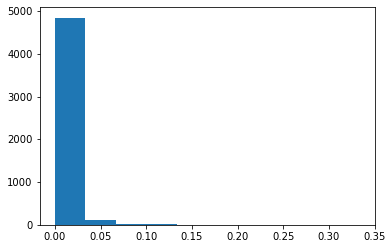

In [156]:
plt.hist(moral_per);

In [159]:
count = 0
for m in moral_per: 
    if m > 0: 
        count+=1
print("Number of moralistic tweets: ", count)
print("Percentage of moralistic in full sample: ", (count / len(clean_tweets))*100)
#about 5% of tweets have some moral language

Number of moralistic tweets:  257
Percentage of moralistic in full sample:  5.153398836976137


I'm not very convinced by this. Seems like overall, very few tweets use this type of language. This may be a good thing that I'm only picking up a little bit of the fatphobia and harassment which persists online. It may be worth looking at those tweets with very high moralistic percentages. 

Let's move on to topic modeling and hope that this gives us more useful information about the type of language used to discuss healthy eating. 

In [160]:
clean_tweets

0       5150 Shaman viminov Wego Damned smith fasshaue...
1       Polyphenols in the diet help rebound quicker b...
2       I m playing Paper Mario I could probably survi...
3         Keep it up I lost nearly 100lbs because of keto
4       D Stone Want to gain more muscle mass Eat more...
                              ...                        
4982    FDA We think it s time to push pause on food a...
4983    Watched a bunch of Paleo youtube vids lately a...
4984    The trick is I m not counting calories because...
4985    UNTIL I LOST THE REST OF WEIGHT I NEED TO LOSE...
4986    Oh look Brian Stelter must have went on the Ke...
Name: clean_text, Length: 4987, dtype: object

In [161]:
#lemmatize our text 
lemmas = [get_lemmas(tweet) for tweet in clean_tweets]

In [163]:
lemmas[0:5]

[['5150',
  'shaman',
  'viminov',
  'wego',
  'damn',
  'smith',
  'fasshauer',
  'lxxl',
  'science',
  'fur',
  'kitsune',
  'lower',
  'stuff',
  'win',
  'keto',
  'work',
  'diabetes'],
 ['polyphenols',
  'diet',
  'help',
  'rebound',
  'quicker',
  'back',
  'normal',
  'immune',
  'function',
  'inflammation',
  'level',
  'polyphenols'],
 ['play',
  'paper',
  'mario',
  'could',
  'probably',
  'survive',
  'might',
  'lose',
  'bit',
  'weight',
  'big',
  'mushroom'],
 ['keep', 'lose', 'nearly', '100lbs', 'keto'],
 ['stone',
  'want',
  'gain',
  'muscle',
  'mass',
  'eat',
  'protein',
  'want',
  'lose',
  'body',
  'fat',
  'eat',
  'protein',
  'want',
  'recover',
  'quickly']]

In [164]:
#create bigrams 
#maybe trigrams later too? 

#create bigrams if they appear > 5 times
bigram = models.Phrases(lemmas, min_count = 5)
bigram_mod = models.phrases.Phraser(bigram)
bigram_lemmas = [bigram_mod[word] for word in lemmas]

In [166]:
#bigram_lemmas
#some interesting ones 
#obviously a lot of advertising here with "next_app" and "ad" appearing so often 
#"lifestyle_fitness" "anxiety_pain" "body_type" "climate_change" "lose_weight" politician names 

## Topic Modeling

In [175]:
dictionary = corpora.Dictionary(bigram_lemmas)
bow_corpus = [dictionary.doc2bow(text) for text in bigram_lemmas]

In [173]:
Lda = gensim.models.ldamodel.LdaModel

In [176]:
coherence = []

for k in range(2,11):
    
    print('Topics: '+str(k))
    
    #these are just the parameters that worked in my last topic modeling
    #will do a grid search for alpha and eta next
    #maybe worth expanding grid search for passes, chunksize, and iterations in next version 
    
    ldamodel = Lda(corpus = bow_corpus, num_topics=k, id2word = dictionary, random_state = 42,\
        passes=10, chunksize = 40, iterations = 100, alpha = 0.5, eta = 5, eval_every = None)
    
    cm = CoherenceModel(model=ldamodel, texts=bigram_lemmas,\
                                                     dictionary=dictionary, coherence='c_v')
    
    print("number of topics: ", k, "coherence: ", cm.get_coherence())
    
    coherence.append((k,cm.get_coherence()))

Topics: 2
number of topics:  2 coherence:  0.30639614901742507
Topics: 3
number of topics:  3 coherence:  0.2412322795744827
Topics: 4
number of topics:  4 coherence:  0.3089013445298121
Topics: 5
number of topics:  5 coherence:  0.25447145443461217
Topics: 6
number of topics:  6 coherence:  0.2958740762581355
Topics: 7
number of topics:  7 coherence:  0.24902593076067822
Topics: 8
number of topics:  8 coherence:  0.257979225808301
Topics: 9
number of topics:  9 coherence:  0.26657531663361944
Topics: 10
number of topics:  10 coherence:  0.2989117241293644


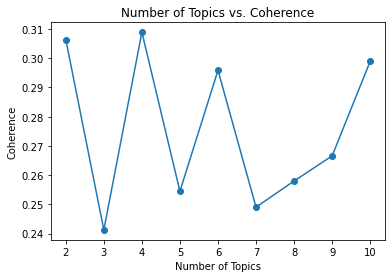

In [177]:
#plot this
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]


plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

Wow this is really all over the place, I really haven't seen any results that look like this and don't converge more...
I'll choose 4 topics for now since that looks like the best option. 

## Mini Hyperparameter Tuning

In [181]:
#values as small as 0.01 have been shown to work well with short documents (like tweets) 

#Alpha
#small numbers (sparse): each document only represents a few topics
#take the approach from: https://stats.stackexchange.com/questions/349761/reasonable-hyperparameter-range-for-latent-dirichlet-allocation
#range from sparse to non-sparse 

alpha = [0.01, 0.05, 0.1, 0.5, 1, 5]

#Beta
#small numbers (sparse) produce more and more granular topics 

beta = [0.01, 0.05, 0.1, 0.5, 1, 5]

#could expand this to also search for other hyperparameters later

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

# iterate through alpha values
for a in alpha:
    # iterare through beta values
    for b in beta:
        # get the coherence score for the given parameters
        #4 topics looked like the best from the above coherence scores 
        ldamodel = Lda(corpus = bow_corpus, num_topics=4, id2word = dictionary, random_state = 42,\
        passes=10, chunksize = 40, iterations = 100, alpha = a, eta = b, eval_every = None)
    

        cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=bigram_lemmas,\
                                                         dictionary=dictionary, coherence='c_v')


        cv = cm.get_coherence()

        # Save the model results
        model_results['Topics'].append(4)
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)

lda_tuning = pd.DataFrame(model_results)


In [182]:
#these are pretty mediocre coherence scores 
#I'll have to think more about how to clean and prepare this later so these are better 
lda_tuning

,Topics,Alpha,Beta,Coherence
0,4,0.01,0.01,0.355811
1,4,0.01,0.05,0.361226
2,4,0.01,0.10,0.328681
3,4,0.01,0.50,0.287381
4,4,0.01,1.00,0.351675
5,4,0.01,5.00,0.257439
6,4,0.05,0.01,0.354287
7,4,0.05,0.05,0.370499
8,4,0.05,0.10,0.317959
9,4,0.05,0.50,0.290725


In [184]:
#10 best models by coherence to choose from 

lda_tuning_sorted = lda_tuning.sort_values(by=['Coherence'])
lda_tuning_sorted.tail(10)

,Topics,Alpha,Beta,Coherence
4,4,0.01,1.00,0.351675
24,4,1.00,0.01,0.353486
6,4,0.05,0.01,0.354287
18,4,0.50,0.01,0.354969
0,4,0.01,0.01,0.355811
33,4,5.00,0.50,0.358602
1,4,0.01,0.05,0.361226
19,4,0.50,0.05,0.364768
13,4,0.10,0.05,0.368208
7,4,0.05,0.05,0.370499


In [185]:
#maximum coherence score model? 
max_coherence = lda_tuning["Coherence"].max()
lda_tuning[lda_tuning["Coherence"]== max_coherence]

,Topics,Alpha,Beta,Coherence
7,4,0.05,0.05,0.370499


These coherence scores are pretty mediocre. I think some additional text cleaning or perhaps a tighter search query would result in more defined and pure topics. Tuning the additional hyperparameters (chunksize, iterations, etc.) may help as well as expanding the dataset size. 

## Topic Visualization 

In [188]:
def LDA_visualize(my_corpus, my_num_topics, my_id2word, my_passes, my_chunksize, my_iter, my_alpha, my_beta, name): 
    """
    Runs an LDA model with the above specifications 
    Saves model in a pickle 
    Prints the model to an HTML to visualize 
    """
    #build LDA model 
    Lda = gensim.models.ldamodel.LdaModel


    lda_model = Lda(corpus=my_corpus, num_topics=my_num_topics, id2word = my_id2word, random_state = 42,\
                    passes=my_passes, chunksize = my_chunksize, iterations = my_iter, eval_every = None,\
                    alpha = my_alpha, eta = my_beta)

    #print keyword in the topics - see if this is a good split? 
    pprint(lda_model.print_topics())

    # Visualize the topics
    pyLDAvis.enable_notebook()

    LDAvis_data_filepath = "ldavis"+ name


    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, my_corpus, my_id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

    pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')



In [189]:
#visualize the most coherent topic model 
LDA_visualize(bow_corpus, 4, dictionary, 10, 40, 100, 0.05, 0.05, "max_coherence") 
#I'll submit the file with this best version visualization and upload it to github too 

[(0,
  '0.109*"lose_weight" + 0.084*"weight" + 0.069*"keto" + 0.068*"lose" + '
  '0.066*"much" + 0.058*"one" + 0.045*"help" + 0.044*"think" + 0.040*"get" + '
  '0.032*"diet"'),
 (1,
  '0.069*"lot_sleep" + 0.048*"lot_rest" + 0.048*"must_eat" + 0.048*"look_self" '
  '+ 0.048*"yeonjun_take" + 0.048*"blame_apologise" + 0.048*"lot_stay" + '
  '0.041*"thing" + 0.034*"level" + 0.030*"cause"'),
 (2,
  '0.261*"eat_late" + 0.171*"obesity" + 0.110*"calorie" + 0.063*"like" + '
  '0.033*"good" + 0.026*"would" + 0.018*"low" + 0.015*"sugar" + 0.014*"bad" + '
  '0.012*"daily"'),
 (3,
  '0.121*"eat" + 0.087*"food" + 0.075*"healthy" + 0.052*"diet" + 0.041*"amp" + '
  '0.038*"go" + 0.034*"lose_weight" + 0.031*"make" + 0.030*"want" + '
  '0.027*"need"')]


In [ ]:
#Thank you again for these Jon! Much cleaner than what I've tried before 

def fill_topic_weights(df_row, bow_corpus, ldamodel):
    '''
    Fill DataFrame rows with topic weights for topics in songs.
    
    Modifies DataFrame rows *in place*.
    '''
    try:
        for i in ldamodel[bow_corpus[df_row.name]]:
            df_row["Topic_" + str(i[0])] = i[1]
    except:
        return df_row
    return df_row

def top_songs_by_topic(tweet_df, ldamodel, corpus, ntop=1):
    '''
    Finds the top "n" tweets by topic, which we can use for
    understanding the types of tweets included in a topic.
    '''
    topn_tweets_by_topic = {}
    for i in range(len(ldamodel.print_topics())):
        # For each topic, collect the most representative tweets(s)
        # (i.e. highest probability containing words belonging to topic):
        top = sorted(zip(range(len(corpus)), ldamodel[corpus]), 
                     reverse=True, 
                     key=lambda x: abs(dict(x[1]).get(i, 0.0)))
        topn_tweets_by_topic[i] = [j[0] for j in top[:ntop]]
        
        # Print out the topn tweets for each topic and return their indices as a dictionary for further analysis:
        print("Topic " + str(i))
        print(tweet_df[['title','year','artist']].loc[topn_tweets_by_topic[i]])
        print("*******************************")
    
    return topn_tweets_by_topic


In [ ]:
# apply to each row: axis=1, args=[bow_corpus] (see function above)
music_df = music_df.apply(music.fill_topic_weights,
                          axis=1, args=[bow_corpus, ldamodel]).fillna(0)

In [ ]:
#plot distribution of topics 
plt.hist(responses["t1_retirement"]);
plt.xlabel("Retirement Topic Score");
plt.ylabel("Number of Responses"); 

# Interpretation 

# Next Steps 